## Final Data Analysis

In [54]:
# Dependencies
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from scipy import stats
from scipy.stats import linregress
import  mplcursors
# %matplotlib nbagg # commenting out for now 
import gmaps
import os

# API Keys and config
from config import api_key
from config import g_key
c = Census(api_key, year=2018)

# Dictionary of state abbreviations
from us_state_abbrev import us_state_abbrev

In [55]:
# Import data

# Dataframe with all counties
full_df = pd.read_csv('resources/full_data.csv')

# Dataframe without high and low pop counties
df = pd.read_csv('resources/data.csv')

In [56]:
display(df.head(), full_df.head())

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939


,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Y_lat,X_lon,Stroke,Party,County,State,Cases per Capita,Deaths per Capita
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,34.220589,-82.457629,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,30.299520,-92.403448,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,37.775819,-75.650899,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749
3,103141,915.0,62.9,446052.0,36.7,63137.0,285.2,43.443657,-116.234724,69.3,REPUBLICAN,Ada,Idaho,0.231231,0.002051
4,1488,46.0,48.5,7124.0,45.4,51859.0,293.1,41.333304,-94.478684,60.1,REPUBLICAN,Adair,Iowa,0.208871,0.006457


## Regional Analysis

In [57]:
#Sorting through states and relegating to correct region

#West Region
West_df = df.loc[(df["State"]=="Washington") | (df["State"]=="Oregon")|(df["State"]=="California") | (df["State"]=="Idaho") 
        | (df["State"]=="Nevada") | (df["State"]=="Utah") | (df["State"]=="Arizona") | (df["State"]=="Alaska") 
        | (df["State"]=="Hawaii"),:]

#Plains Region
Plains_df = df.loc[(df["State"]=="Montana") | (df["State"]=="North Dakota")|(df["State"]=="South Dakota") | (df["State"]=="Wyoming") 
        | (df["State"]=="Nebraska") | (df["State"]=="Colorado") | (df["State"]=="Oklahoma") | (df["State"]=="Kansas") 
        | (df["State"]=="Texas") | (df["State"]=="New Mexico"),:]

#Midwest Region
Midwest_df = df.loc[(df["State"]=="Minnesota") | (df["State"]=="Wisconsin")|(df["State"]=="Michigan") | (df["State"]=="Iowa") 
        | (df["State"]=="Illinois") | (df["State"]=="Indiana") | (df["State"]=="Ohio") | (df["State"]=="Missouri") 
        | (df["State"]=="Kentucky"),:]

#Southeast Region
Southeast_df = df.loc[(df["State"]=="Arkansas") | (df["State"]=="Louisiana")|(df["State"]=="Tennessee") | (df["State"]=="Mississippi") 
        | (df["State"]=="Alabama") | (df["State"]=="Georgia") | (df["State"]=="Florida") | (df["State"]=="North Carolina") 
        | (df["State"]=="South Carolina"),:]

#Northeast Region of US
Northeast_df = df.loc[(df["State"]=="Maine") | (df["State"]=="New Hampshire")|(df["State"]=="Vermont") | (df["State"]=="New York") 
        | (df["State"]=="Massachusetts") | (df["State"]=="Connecticut") | (df["State"]=="Rhode Island") | (df["State"]=="New Jersey") 
        | (df["State"]=="Pennsylvania") | (df["State"]=="Delaware") | (df["State"]=="West Virginia") | (df["State"]=="Virginia")
        | (df["State"]=="Maryland"),:]

#labels
West = ["Washington","Oregon","California","Idaho","Nevada","Utah","Arizona","Alaska","Hawaii"]
Plains = ["Montana","North Dakota","South Dakota","Wyoming","Nebraska","Colorado","Oklahoma","Kansas","Texas","New Mexico"]
Midwest = ["Minnesota","Wisconsin","Michigan","Iowa","Illinois","Indiana","Ohio","Missouri","Kentucky"]
Southeast = ["Arkanas","Louisiana","Tennessee","Mississippi","Alabama","Georgia","Florida","North Carolina","South Carolina"]
Northeast = ["Maine","New Hampshire","Vermont","New York","Massachusetts","Connecticut","Rhode Island",
             "New Jersey","Pennsylvania","Delaware","West Virginia","Virginia","Maryland"]

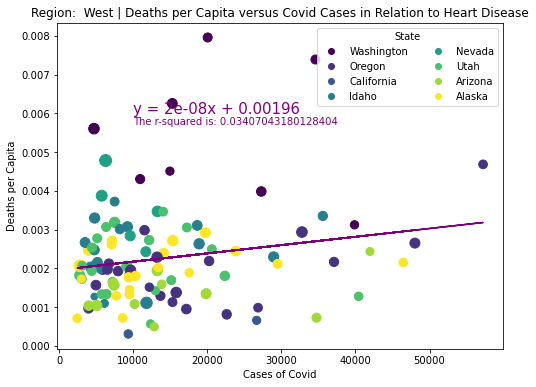

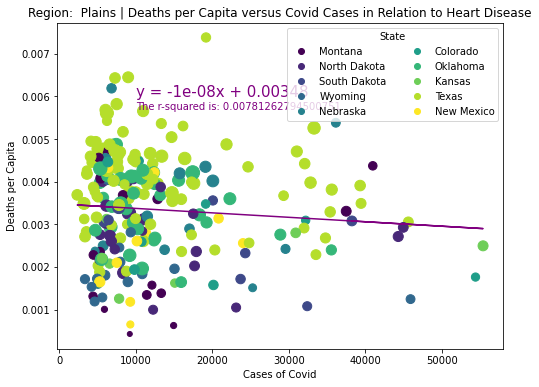

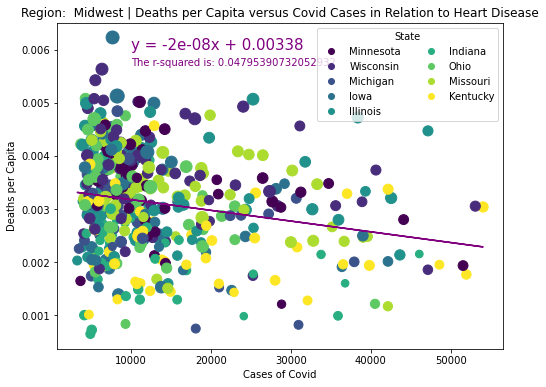

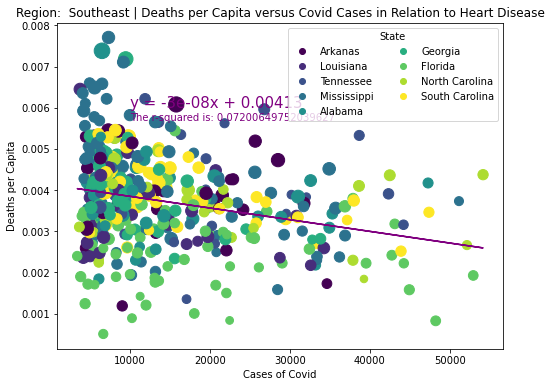

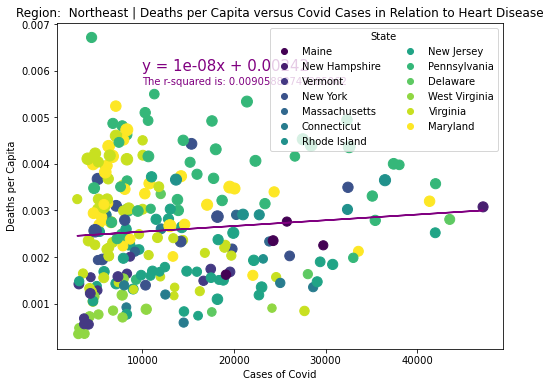

In [58]:
title = ["West", "Plains", "Midwest", "Southeast", "Northeast"]
State_list = [West_df,Plains_df,Midwest_df,Southeast_df,Northeast_df]
labels = [West, Plains, Midwest, Southeast, Northeast]
holder = 0

for index in range(len(State_list)):
    plt.figure(figsize=(8,6))
    plt.xlabel("Cases of Covid")
    plt.ylabel("Deaths per Capita")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(State_list[index]["Cases"], State_list[index]["Deaths per Capita"])
    regress_values = State_list[index]["Cases"] * slope + intercept
    line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,5))
    Scatter2 = plt.scatter(State_list[index]["Cases"],State_list[index]["Deaths per Capita"],s=State_list[index]["Heart Disease"]*.3,
            c=State_list[index].State.astype('category').cat.codes)
    plt.plot(State_list[index]["Cases"],regress_values,color = "purple")
    plt.annotate(line_eq,(10000,.006),fontsize=15,color = "purple")
    plt.annotate(f"The r-squared is: {rvalue**2}",(10000,.0057),fontsize=10,color = "purple")
    #Hover Event
    mplcursors.cursor(Scatter2, hover=True)
    plt.legend(loc="upper right", ncol= 2, handles=Scatter2.legend_elements()[0], 
           labels=labels[index],
           title="State")
    plt.title (f"Region:  {title[holder]} | Deaths per Capita versus Covid Cases in Relation to Heart Disease")
    plt.savefig(f'output_images/cases_vs_death-{title[holder]}.png')
    holder = holder + 1

When we run the full regional analysis we can see that many of the calculated r-values show there is little to no correlation between the county population of the states, covid cases, and death per capita. By doing this analysis first, we are able to narrow down what could be a contributing factor for covid cases that does not pertain to population.

## Box Plots

Comment: Try to trim down to two figures (one plot and one heatmap?) that gets the main message across. Summarize with a couple sentences in markdown cell. -ES

In [6]:
#Divide states in 2 by alphabetical order
first_half_states = df[df["State"].str[0] <= "M"] #Select those states whose first letter <= "M"
second_half_states= df[df["State"].str[0] > "M"] #Select those states whose first letter > "M"

In [7]:
def create_vertical_box_plot(figsize,title,df1,df2,column,by,ylabel_1,ylabel_2):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
    
    df1.boxplot(ax = ax1,column = column, by=by, rot = 90); #figsize=(20,10)
    ax1.set_title(ylabel_1, fontsize = 12);

    df2.boxplot(ax = ax2,column =column, by=by, rot = 90);
    ax2.set_title(ylabel_2, fontsize = 12);
    
    fig.tight_layout(pad = 3) #separation between boxplots
    fig.suptitle(title, fontsize = 20, fontweight = "bold")
    return

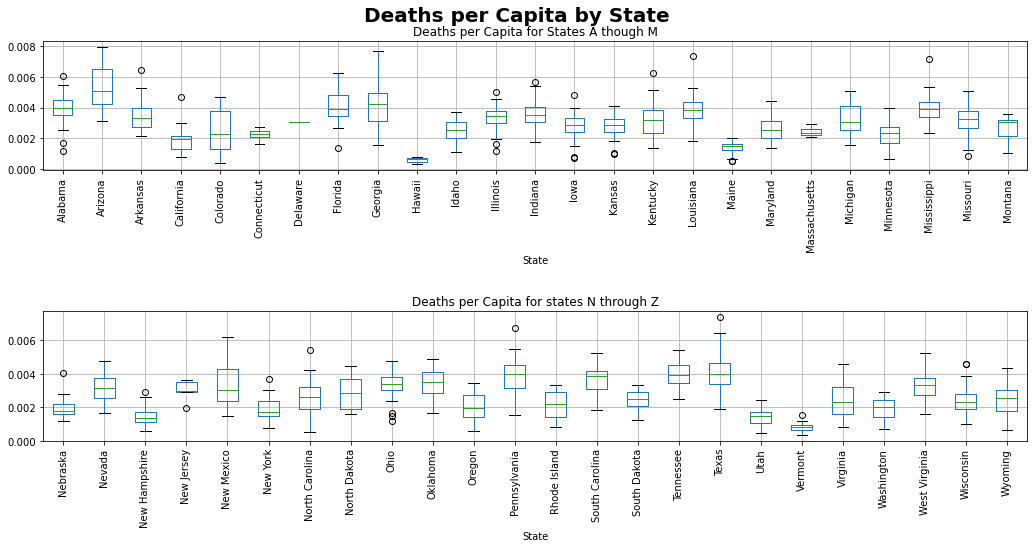

In [32]:
#Create box plot deaths per capita calling function above
create_vertical_box_plot((20,10),"Deaths per Capita by State",first_half_states, second_half_states, 
                         "Deaths per Capita","State", "Deaths per Capita for States A though M", 
                         "Deaths per Capita for states N through Z")
plt.savefig('output_images/state_cases_per_capita_N-Z.png')

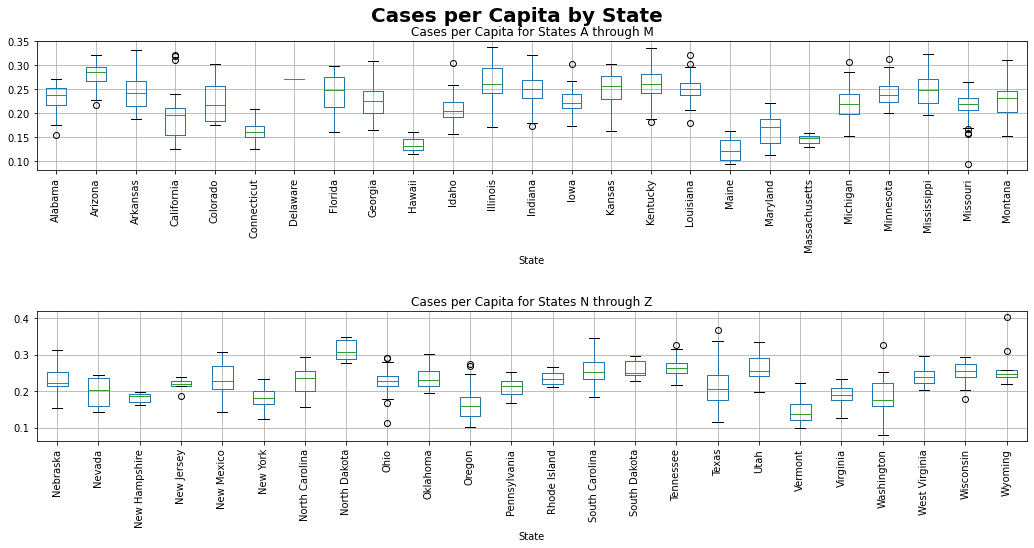

In [31]:
create_vertical_box_plot((20,10),"Cases per Capita by State",first_half_states,second_half_states,
                         "Cases per Capita","State","Cases per Capita for States A through M",
                         "Cases per Capita for States N through Z");
plt.savefig('output_images/state_cases_per_capita_A-M.png')

## COVID Over Time

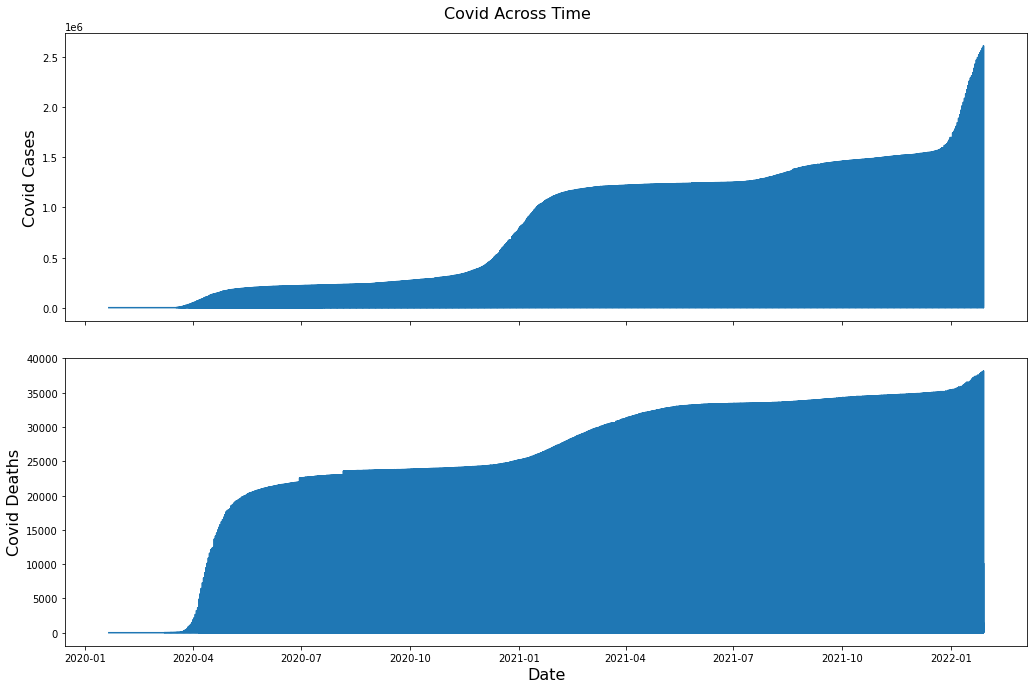

In [30]:
# Read from original day-by-day data
covid_df = pd.read_csv('resources/covid-statistics.csv')

covid_df["date"] = pd.to_datetime(covid_df["date"])

date = covid_df["date"]
covid_cases = covid_df["cases"]
covid_deaths = covid_df["deaths"]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10),sharex = True) #removed sharey = True

ax1.plot(date, covid_cases)
ax1.set_ylabel("Covid Cases", fontsize = 16)

ax2.plot(date, covid_deaths);
ax2.set_ylabel("Covid Deaths", fontsize = 16)
ax2.set_xlabel("Date", fontsize = 16)

fig.suptitle('Covid Across Time', fontsize=16)
fig.tight_layout(pad = 3) #separation between plots
plt.savefig('output_images/covid_over_time.png')

## Heat Maps

In [11]:
#Select those states with Highest number of Cases per Capita
#Sort Descending by Cases per Capita
sorted_df_by_cases = full_df.sort_values(by=["Cases per Capita"], ascending=False,ignore_index = True).head(5)

#create locations for heatmap
locations_sorted_df_by_cases = sorted_df_by_cases[["Y_lat", "X_lon"]]

#Select those states with Highest number of Deaths per Capita
#Sort Descending by Cases per Capita
sorted_df_by_deaths = full_df.sort_values(by=["Deaths per Capita"], ascending=False, ignore_index = True).head(5)

#create locations and info for box templaye for heatmap
locations_sorted_df_by_deaths = sorted_df_by_deaths[["Y_lat", "X_lon"]]

In [12]:
# Using the template add the County/State to the heatmap
info_box_template_cases_per_capita = """
<dl>
<dt>County</dt><dd>{County}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Cases per Capita</dt><dd>{Cases per Capita}</dd>
</dl>
"""

box_template_cases = [info_box_template_cases_per_capita.format(**row) for index, row in sorted_df_by_cases.iterrows()]

# Using the template add the County/State to the heatmap
info_box_template_deaths_per_capita = """
<dl>
<dt>County</dt><dd>{County}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Deaths per Capita</dt><dd>{Deaths per Capita}</dd>
</dl>
"""

box_template_deaths = [info_box_template_deaths_per_capita.format(**row) for index, row in sorted_df_by_deaths.iterrows()]

In [13]:
def create_map(weights, max_intensity, locations_for_marker_layer, info_box_for_marker_layer, locations_for_symbol_layer, info_box_for_symbol_layer):
    figure = gmaps.figure()
    locations = full_df[["Y_lat", "X_lon"]]
    heat_layer = gmaps.heatmap_layer(locations, weights = weights, dissipating = False, max_intensity = max_intensity,point_radius = 0.3)
    figure.add_layer(heat_layer)
    
    # Add marker layer ontop of heat map
    markers = gmaps.marker_layer(locations_sorted_df_by_cases, info_box_content = info_box_for_marker_layer)
    figure.add_layer(markers)
    symbol_layer = gmaps.symbol_layer(locations_for_symbol_layer, info_box_content=info_box_for_symbol_layer)
    figure.add_layer(symbol_layer)

    return figure

In [14]:
figure1 = create_map(full_df["Heart Disease"], 600, locations_sorted_df_by_cases, 
                     box_template_cases,locations_sorted_df_by_deaths,box_template_deaths)
figure1

Figure(layout=FigureLayout(height='420px'))

In [15]:
figure2 = create_map(full_df["Stroke"], 0.1, locations_sorted_df_by_cases, info_box_template_cases_per_capita,
                     locations_sorted_df_by_deaths,info_box_template_deaths_per_capita)
figure2

Figure(layout=FigureLayout(height='420px'))

## Anova Analysis for Median Income

The first figure that follows is two box plots based on incomes compared first to cases per capita and then deaths per capita to illustrate the difference in median and spread for the Anova test that follows.

The second figure is a bar chart with normalized values to show differences in counties outside the IQR with those inside the IQR. Error bars represent standard deviation.

In [16]:
#Binning income ranges to do anova analysis
data = df.copy()
bins = [-float('inf'), 50000, 70000, float('inf')]
income_ranges = ['<$50,000', "\$50,000-\$70,000", ">$70,000"]
data["Median Income Range"] = pd.cut(data["Household Income"], bins, labels=income_ranges, include_lowest=True)
data.head()

,Cases,Deaths,Vaccination Rate,Population,Median Age,Household Income,Heart Disease,Stroke,Party,County,State,Cases per Capita,Deaths per Capita,Median Income Range
0,6104,57.0,39.2,24657.0,43.8,36685.0,321.0,78.6,REPUBLICAN,Abbeville,South Carolina,0.247556,0.002312,"<$50,000"
1,14951,269.0,51.8,62568.0,36.2,41177.0,476.2,93.6,REPUBLICAN,Acadia,Louisiana,0.238956,0.004299,"<$50,000"
2,6569,90.0,70.7,32742.0,45.9,43210.0,411.2,92.1,REPUBLICAN,Accomack,Virginia,0.200629,0.002749,"<$50,000"
3,5535,56.0,44.0,25325.0,27.7,40046.0,335.1,80.7,REPUBLICAN,Adair,Missouri,0.218559,0.002211,"<$50,000"
4,6678,65.0,34.8,22113.0,37.6,32986.0,575.0,62.7,REPUBLICAN,Adair,Oklahoma,0.301994,0.002939,"<$50,000"


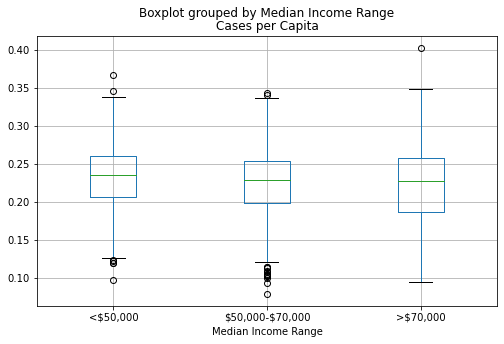

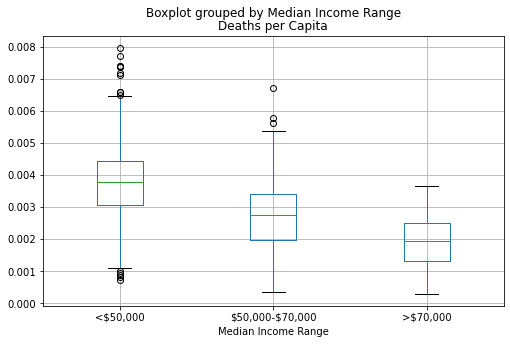

In [28]:
data.boxplot("Cases per Capita", by="Median Income Range", figsize=(8, 5))
plt.savefig('output_images/income_v_cases_boxplot.png')
data.boxplot("Deaths per Capita", by="Median Income Range", figsize=(8, 5))
plt.savefig('output_images/income_v_deaths_boxplot.png')
plt.show()

In [18]:
# Extract individual groups and perform ANOVA test
income_groups = []
for i in income_ranges:   
    income_groups.append(data[data["Median Income Range"] == i]["Deaths per Capita"])
_, p = stats.f_oneway(*income_groups)
print(f"The null hypothesis' pvalue for income ranges is {p}")
income_groups = []
for i in income_ranges:   
    income_groups.append(data[data["Median Income Range"] == i]["Cases per Capita"])
_, p = stats.f_oneway(*income_groups)
print(f"The null hypothesis' pvalue for income ranges is {p}")

The null hypothesis' pvalue for income ranges is 2.053183505933904e-90
The null hypothesis' pvalue for income ranges is 0.0005751076241736748


In [19]:
#function to get outliers from column of dataframe, returns dataframe of low outliers and high outliers
def getoutliers(x, y):
    quant = x[y].quantile([.25,.5,.75])
    iqr = quant[.75]-quant[.25]
    return x.where(x[y] < (quant[.25] - (1.5 * iqr))).dropna(),  x.where(x[y] > (quant[.75] + (1.5 * iqr))).dropna()

In [20]:
#filtering for low income counties (where most outliers are present), then 
#get outlier dataframes and dropping the from low income dataframe
lowincome_df = data.where(data["Median Income Range"] == "<$50,000").dropna()
lowincome_df.drop(columns = ['Population', 'Cases', 'Deaths', 'Cases per Capita', 'Median Age'], inplace = True)
outliers_low, outliers_high = getoutliers(lowincome_df, 'Deaths per Capita')
lowincome_df.drop(outliers_low.index, inplace = True)
lowincome_df.drop(outliers_high.index, inplace = True)

In [21]:
#creating summary dataframes with median of each relevant statistic and a separate 
#standard deviation dataframe for each of those statistics

outliers = pd.DataFrame([outliers_high.describe().loc['50%'], 
                         lowincome_df.describe().loc['50%'], outliers_low.describe().loc['50%']], 
                        ['High Outliers', 'In Range', 'Low Outliers'])
errors =  pd.DataFrame([outliers_high.describe().loc['std'], 
                        lowincome_df.describe().loc['std'], outliers_low.describe().loc['std']], 
                       ['High Outliers', 'In Range', 'Low Outliers'])

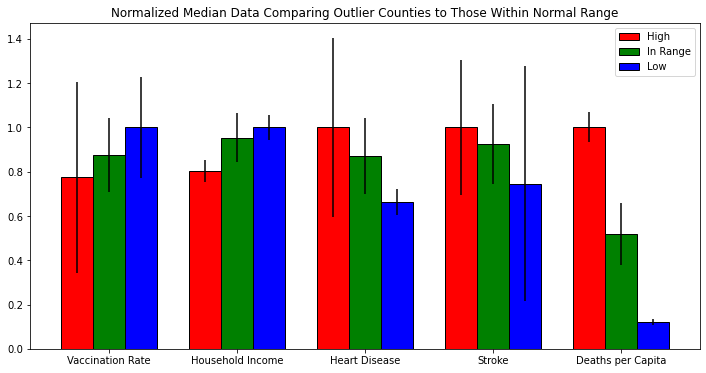

In [29]:
#Normalize the data from outliers and errors dataframes and present summary bar chart
for i in outliers.columns:
    maxval = outliers[i].abs().max()
    outliers[i] = outliers[i] / maxval
    errors[i] = errors[i]/maxval
    
outliers

bar_width = 0.25
fig = plt.subplots(figsize =(12, 6))

high = outliers.iloc[0]
mid = outliers.iloc[1]
low = outliers.iloc[2]

br1 = np.arange(len(outliers.columns))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

plt.bar(br1, high, color ='r', width = bar_width,
        edgecolor ='black', label ='High', yerr=errors.iloc[0])
plt.bar(br2, mid, color ='g', width = bar_width,
        edgecolor ='black', label ='In Range', yerr=errors.iloc[1])
plt.bar(br3, low, color ='b', width = bar_width,
        edgecolor ='black', label ='Low', yerr = errors.iloc[2])

plt.xticks([r + bar_width for r in range(len(outliers.columns))],
        outliers.columns)

plt.title('Normalized Median Data Comparing Outlier Counties to Those Within Normal Range')
plt.legend()

plt.savefig('output_images/outlier_histogram.png')
plt.show()

## Effects of Political Views (Eddy's)

In [23]:
# Split full dataframe according to political party voted for in 2020
reds = full_df[full_df['Party'] == 'REPUBLICAN']
blues = full_df[full_df['Party'] == 'DEMOCRAT']

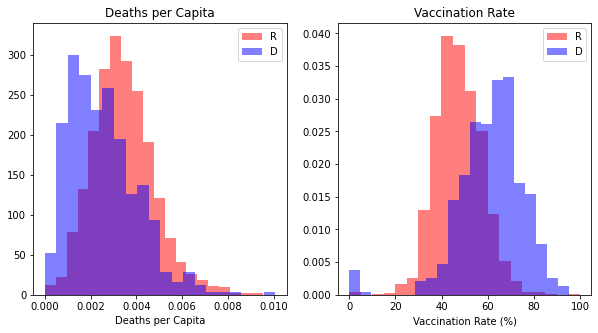

In [50]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.hist(reds['Deaths per Capita'], color='red', label='R', density=True, alpha=0.5, bins=20)
ax1.hist(blues['Deaths per Capita'], color='blue', label='D', density=True, alpha=0.5, bins=20)
ax1.set_title('Deaths per Capita')
ax1.set_xlabel('Deaths per Capita')
ax1.legend()

ax2.hist(reds['Vaccination Rate'], color='red', label='R', density=True, alpha=0.5, bins=20)
ax2.hist(blues['Vaccination Rate'], color='blue', label='D', density=True, alpha=0.5, bins=20)
ax2.set_title('Vaccination Rate')
ax2.set_xlabel('Vaccination Rate (%)')
ax2.legend()
plt.savefig('output_images/political_t-tests.png')
plt.show()

In [25]:
# Function to make boxplots and carry out t-tests
def makeBoxPlot(ax, feature, unit=None, showfliers=True):
    r = reds[feature]
    d = blues[feature]
    
    bp = ax.boxplot([r, d], labels=['Republican', 'Democrat'], showfliers=showfliers, 
                    patch_artist=True, medianprops={'color': 'k'}, widths=0.3)
                                                    
    bp['boxes'][0].set(facecolor='red', alpha=0.7)
    bp['boxes'][1].set(facecolor='blue', alpha=0.6)
    
    if unit:
        ylabel = f'{feature} ({unit})'
    else:
        ylabel = feature
    
    ax.set_ylabel(ylabel)
    ax.set_title(feature)
    
    # t-test
    tstat, pvalue = stats.ttest_ind(r, d, equal_var=False)
    l = [tstat, pvalue, feature]
    
    return l

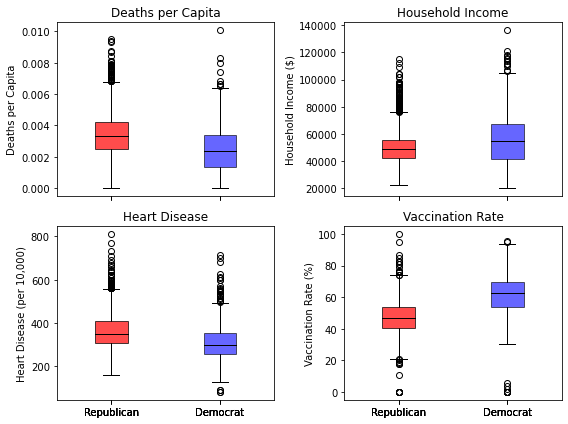

In [51]:
# Make boxplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, figsize=(8, 6))
rows = []

rows.append(makeBoxPlot(ax1, 'Deaths per Capita'))
rows.append(makeBoxPlot(ax2, 'Household Income', '$'))
rows.append(makeBoxPlot(ax3, 'Heart Disease', 'per 10,000'))
rows.append(makeBoxPlot(ax4, 'Vaccination Rate', '%'))

plt.tight_layout()
plt.savefig('output_images/political_boxplots.png')
plt.show()

In [52]:
# Summary of t-tests
ttest_df = pd.DataFrame(rows)
ttest_df.columns = ['t-statistic', 'p-value', '']
ttest_df.set_index('', inplace=True)

ttest_df

,t-statistic,p-value
,,
Deaths per Capita,11.988907,4.341622e-30
Household Income,-6.971634,9.006186e-12
Heart Disease,10.603520,2.649415e-24
Vaccination Rate,-20.152412,6.060113e-69
